# Preparing the data for model input

In [2]:
train_data = pd.read_csv('/Users/pin.lyu/Desktop/2024_Case_Comp_BC/Data/train.csv')

test_data = pd.read_csv('/Users/pin.lyu/Desktop/2024_Case_Comp_BC/Data/test.csv')

In [3]:
def forward_fill_by_patient(df, patient_id_col='patient'):
    # Create a copy of the original DataFrame
    df_imputed = df.copy()

    df_imputed.loc[:, df_imputed.columns != patient_id_col] = (
        df_imputed.groupby(patient_id_col)
        .ffill()
    )
    
    # If there are patients with no entries for a column, those columns will remain unchanged
    return df_imputed

In [6]:
pre_imputed_train = backward_fill_by_patient(train_forward)
pre_imputed_train.head()

# Using K Means Imputation

In [7]:
#scaling entire data set 

# DONE : Track initial null indexes to be imputed
#indices = pre_imputed_train.isna()

# DONE : Creat simple imputer to fill NaN values with the mean
#imputer = SimpleImputer(strategy='mean')
#imputed_train = pd.DataFrame(imputer.fit_transform(pre_imputed_train), columns = pre_imputed_train.columns)

# TODO : Separate train/test before scaling
#imputed_train_x_unscaled = imputed_train.drop("SepsisLabel", axis = 1, inplace = False)
#train_y = imputed_train['SepsisLabel']

# DONE : Scale the variables
#scaler = StandardScaler()
#scaled_train_x = pd.DataFrame(scaler.fit_transform(imputed_train_x_unscaled), columns = imputed_train_x_unscaled.columns)

# DONE : Put back together for full dataframe
#scaled_train = scaled_train_x.join(train_y)
#scaled_train.head()

In [9]:
# DONE : Use KMeans clusetering 
k = 8
k_means_class = KMeans(n_clusters= k, max_iter=300)

clusters = k_means_class.fit_predict(scaled_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
# DONE : Ensure the filtering worked
print(scaled_train.isna().sum())

HR                  0
O2Sat               0
Temp                0
SBP                 0
MAP                 0
DBP                 0
Resp                0
EtCO2               0
BaseExcess          0
HCO3                0
FiO2                0
pH                  0
PaCO2               0
SaO2                0
AST                 0
BUN                 0
Alkalinephos        0
Calcium             0
Chloride            0
Creatinine          0
Bilirubin_direct    0
Glucose             0
Lactate             0
Magnesium           0
Phosphate           0
Potassium           0
Bilirubin_total     0
TroponinI           0
Hct                 0
Hgb                 0
PTT                 0
WBC                 0
Fibrinogen          0
Platelets           0
Age                 0
patient             0
time                0
Gender              0
Unit1               0
Unit2               0
HospAdmTime         0
ICULOS              0
SepsisLabel         0
dtype: int64


In [12]:
# DONE : Try the experimental imputer
# NOTE: THIS TAKES FOREVER, DON'T RUN UNLESS 100% NECESSARY
#imputer = IterativeImputer(random_state=0)
#train_data_imputed = imputer.fit(train_data)
# train_data_imputed = imputer.transform(train_data)
# train_data_imputed_df = pd.DataFrame(train_data_imputed, columns = imputer.get_feature_names_out())#, columns = imputer.get_feature_names_out())
# train_data_imputed_df.head(5)
# train_data_imputed_df.to_pickle("../Data/imputedData/iterative_imputed.pkl", index = False)

In [13]:
X = scaled_train.drop(columns = ['SepsisLabel'])
y = scaled_train['SepsisLabel']


sm = SMOTE(sampling_strategy=0.3, k_neighbors=5, random_state=100)
X_train_syn, y_train_syn = sm.fit_resample(X, y)

print(scaled_train.iloc[:, 0:4].describe())
print(X_train_syn.iloc[:, 0:4].describe())

                 HR         O2Sat          Temp           SBP
count  1.088197e+06  1.088197e+06  1.088197e+06  1.088197e+06
mean  -2.207561e-07 -8.626116e-07 -3.367238e-06  4.620113e-06
std    1.000000e+00  1.000000e+00  1.000001e+00  1.000001e+00
min   -3.694685e+00 -2.456949e+01 -4.960314e+01 -5.328192e+00
25%   -7.105684e-01 -3.667800e-01 -6.346818e-01 -7.188438e-01
50%   -7.931298e-02  2.701335e-01 -8.136589e-02 -1.157515e-01
75%    6.093293e-01  5.885903e-01  6.102790e-01  6.165749e-01
max    7.266204e+00  9.070471e-01  1.817806e+01  7.595214e+00
                 HR         O2Sat          Temp           SBP
count  1.389147e+06  1.389147e+06  1.389147e+06  1.389147e+06
mean   8.049532e-02 -1.321748e-02  8.212705e-02 -2.348677e-02
std    1.031400e+00  1.017700e+00  1.086267e+00  1.002285e+00
min   -3.694685e+00 -2.456949e+01 -4.960314e+01 -5.328192e+00
25%   -6.531815e-01 -3.667800e-01 -5.793502e-01 -7.619218e-01
50%    6.767295e-03  2.701335e-01  4.313019e-02 -1.157515e-01
75%    7

In [14]:
print(scaled_train['SepsisLabel'].describe())
print(y_train_syn.describe())

count    1.088197e+06
mean     1.803166e-02
std      1.330659e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: SepsisLabel, dtype: float64
count    1.389147e+06
mean     2.307690e-01
std      4.213250e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: SepsisLabel, dtype: float64


 # Test Data preparation 


In [17]:
# forward fill 
test_data['HR'] = pd.to_numeric(test_data['HR'], errors='coerce')

test_filled = forward_fill_by_patient(test_data)
test_filled.head()

,patient,time,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
0,6560,1,110.0,98.0,37.67,124.0,78.00,NaN,16.0,NaN,...,NaN,NaN,NaN,NaN,81.64,1.0,1.0,0.0,-0.03,2.0
1,6560,2,103.0,96.0,37.67,101.0,69.67,NaN,16.0,NaN,...,NaN,NaN,NaN,NaN,81.64,1.0,1.0,0.0,-0.03,3.0
2,6560,3,105.0,96.0,37.67,125.0,75.67,NaN,16.0,NaN,...,NaN,NaN,NaN,NaN,81.64,1.0,1.0,0.0,-0.03,4.0
3,6560,4,118.0,94.0,37.67,150.0,94.67,NaN,16.0,NaN,...,NaN,NaN,NaN,NaN,81.64,1.0,1.0,0.0,-0.03,5.0
4,6560,5,99.0,94.0,37.50,98.0,64.00,NaN,16.0,NaN,...,NaN,NaN,NaN,NaN,81.64,1.0,1.0,0.0,-0.03,6.0


In [18]:
# backward fill 
pre_imputed_test = backward_fill_by_patient(test_filled)
pre_imputed_test.head()

,patient,time,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
0,6560,1,110.0,98.0,37.67,124.0,78.00,NaN,16.0,NaN,...,25.8,7.3,NaN,127.0,81.64,1.0,1.0,0.0,-0.03,2.0
1,6560,2,103.0,96.0,37.67,101.0,69.67,NaN,16.0,NaN,...,25.8,7.3,NaN,127.0,81.64,1.0,1.0,0.0,-0.03,3.0
2,6560,3,105.0,96.0,37.67,125.0,75.67,NaN,16.0,NaN,...,25.8,7.3,NaN,127.0,81.64,1.0,1.0,0.0,-0.03,4.0
3,6560,4,118.0,94.0,37.67,150.0,94.67,NaN,16.0,NaN,...,25.8,7.3,NaN,127.0,81.64,1.0,1.0,0.0,-0.03,5.0
4,6560,5,99.0,94.0,37.50,98.0,64.00,NaN,16.0,NaN,...,25.8,7.3,NaN,127.0,81.64,1.0,1.0,0.0,-0.03,6.0


In [19]:
#scaling ommiting some variables 

#imputer = SimpleImputer(strategy='mean')
#imputed_test = pd.DataFrame(imputer.fit_transform(pre_imputed_test), columns=pre_imputed_test.columns)

# Identify columns to exclude from scaling
#exclude_cols = ['patient', 'time', 'Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS']

# Separate columns into those to scale and those to exclude
#cols_to_scale = imputed_test.drop(columns=exclude_cols).columns
#scaled_data = imputed_test[cols_to_scale]

# Scale the selected columns
#scaler = StandardScaler()
#scaled_scaled_data = pd.DataFrame(scaler.fit_transform(scaled_data), columns=cols_to_scale)

# Combine scaled data with excluded columns
#scaled_test = pd.concat([scaled_scaled_data, imputed_test[exclude_cols]], axis=1)

# Display the resulting DataFrame
#print(scaled_test.head())

# SCALING WHILE OMITING SOME VARIABLES FIXED# 
indices_test = pre_imputed_test.isna()

# Create Simple Imputer to fill NaN values with the mean for test data
imputer = SimpleImputer(strategy='mean')
imputed_test = pd.DataFrame(imputer.fit_transform(pre_imputed_test), columns=pre_imputed_test.columns)

# Separate columns into those to scale and those to exclude (no target variable in test)
cols_to_scale_test = imputed_test.drop(columns=exclude_cols).columns

# Scale the selected columns using the already-fitted scaler
scaled_test_data = pd.DataFrame(scaler.transform(imputed_test[cols_to_scale_test]), columns=cols_to_scale_test)

# Combine scaled data with excluded columns
scaled_test = pd.concat([scaled_test_data, imputed_test[exclude_cols]], axis=1)

In [20]:
#scaling entire data set

#indices_test = pre_imputed_test.isna()

# Create Simple Imputer to fill NaN values with the mean for test data
#imputed_test = pd.DataFrame(imputer.transform(pre_imputed_test), columns=pre_imputed_test.columns)

# Separate test features (no target in test set)
#imputed_test_x_unscaled = imputed_test  # No need to drop 'SepsisLabel' since it doesn't exist

# Scale the test variables using the already-fitted scaler
#test_scaled = scaler.transform(imputed_test_x_unscaled)

# Convert to DataFrame for easy handling if needed
#scaled_test = pd.DataFrame(test_scaled, columns=imputed_test_x_unscaled.columns)

In [21]:
# DONE : Use KMeans clusetering 
k = 8
k_means_class = KMeans(n_clusters= k, max_iter=300)

clusters = k_means_class.fit_predict(scaled_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
# DONE : Impute the missing values based upon means
for cluster in range(k):
    cluster_indices = np.where(clusters == cluster)[0]
    cluster_data = scaled_test.iloc[cluster_indices]
    cluster_mean = cluster_data.mean()

    for col in scaled_test.columns:
        for index in cluster_indices:
            if (indices.at[index, col] == True):
                scaled_test.at[index, col] = cluster_mean[col]

In [23]:
# DONE : Ensure the filtering worked
print(scaled_test.isna().sum())

HR                  0
O2Sat               0
Temp                0
SBP                 0
MAP                 0
DBP                 0
Resp                0
EtCO2               0
BaseExcess          0
HCO3                0
FiO2                0
pH                  0
PaCO2               0
SaO2                0
AST                 0
BUN                 0
Alkalinephos        0
Calcium             0
Chloride            0
Creatinine          0
Bilirubin_direct    0
Glucose             0
Lactate             0
Magnesium           0
Phosphate           0
Potassium           0
Bilirubin_total     0
TroponinI           0
Hct                 0
Hgb                 0
PTT                 0
WBC                 0
Fibrinogen          0
Platelets           0
Age                 0
patient             0
time                0
Gender              0
Unit1               0
Unit2               0
HospAdmTime         0
ICULOS              0
dtype: int64


In [24]:
# DONE : Convert to pickle
#scaled_test.to_pickle(kmeansTrainFilePickle)
scaled_test.to_csv('scaled_test_data.csv', index=False)

### PCA

In [25]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
X_train = resampled_train.drop(columns=['SepsisLabel','HospAdmTime','ICULOS'])  

# Apply PCA

pca = PCA(n_components=None) 

pca_data = pca.fit_transform(X_train)

# Check the explained variance ratio
print(pca.explained_variance_ratio_)

# Total explained variance by all components

print(sum(pca.explained_variance_ratio_))


[9.99974860e-01 2.45676677e-05 4.88680421e-08 3.69560554e-08
 3.66059730e-08 3.30772804e-08 2.99921891e-08 2.58181957e-08
 2.31276795e-08 2.17800543e-08 1.89052447e-08 1.83052467e-08
 1.77511817e-08 1.70359883e-08 1.57829076e-08 1.54704117e-08
 1.50370401e-08 1.47881640e-08 1.44578917e-08 1.40830756e-08
 1.38154815e-08 1.34220704e-08 1.28205554e-08 1.20797124e-08
 1.17841929e-08 1.17229747e-08 1.14280362e-08 1.04446285e-08
 1.01044572e-08 8.97240158e-09 7.93048296e-09 6.25433270e-09
 5.75422538e-09 4.91017454e-09 3.79263572e-09 3.24034772e-09
 2.97955854e-09 2.30838842e-09 8.89933907e-10 1.08069410e-35]
1.0000000000000002


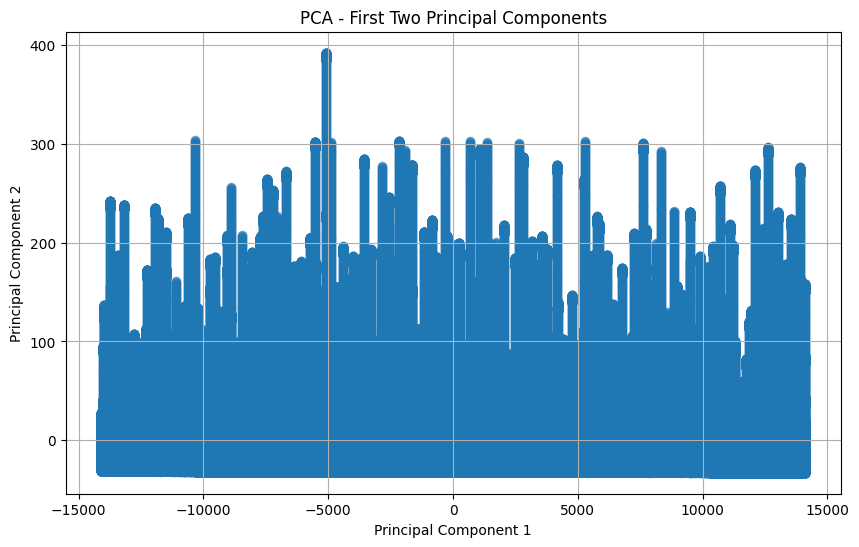

In [45]:


# Transform the data using the first two principal components
pca_2d = PCA(n_components=2)
pca_2d_data = pca_2d.fit_transform(X_train)

# Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d_data[:, 0], pca_2d_data[:, 1], alpha=0.5)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()



In [46]:
# Get the PCA components (loadings)
loadings = pca.components_

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings, columns=X_train.columns)

# Set pandas options to display floats in a more readable format
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Get the loadings for the first principal component
first_pc_loadings = loadings_df.iloc[0]


# Display the loadings for the first principal component separately (optional)
print("\nLoadings for the First Principal Component:")
print(first_pc_loadings)


Loadings for the First Principal Component:
HR                  0.000001
O2Sat               0.000001
Temp                0.000000
SBP                 0.000001
MAP                 0.000001
DBP                 0.000001
Resp                0.000001
EtCO2              -0.000000
BaseExcess          0.000001
HCO3                0.000001
FiO2                0.000000
pH                  0.000001
PaCO2               0.000001
SaO2                0.000001
AST                -0.000001
BUN                -0.000001
Alkalinephos       -0.000001
Calcium            -0.000000
Chloride            0.000000
Creatinine          0.000000
Bilirubin_direct    0.000001
Glucose             0.000002
Lactate            -0.000001
Magnesium          -0.000001
Phosphate           0.000001
Potassium           0.000000
Bilirubin_total    -0.000003
TroponinI          -0.000002
Hct                -0.000000
Hgb                -0.000001
PTT                -0.000001
WBC                -0.000000
Fibrinogen          0.00000

In [52]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# Set the multi-index for your panel data
df = resampled_train.set_index(['patient', 'time'])

# Prepare the dependent variable (y) and independent variables (X)
X = df[['Glucose', 'Fibrinogen', 'Bilirubin_total']]  # Remove 'Age' if it does not vary within entities
X = sm.add_constant(X)  # Add a constant term

y = df['SepsisLabel']  # Your binary dependent variable

# Combine y and X into a single DataFrame for the formula
df_combined = X.copy()
df_combined['SepsisLabel'] = y

# Fit the model using the fixed effects estimator
model = PanelOLS.from_formula('SepsisLabel ~ Glucose + Fibrinogen + Bilirubin_total + EntityEffects', data=df_combined)

# Get the results without drop_absorbed
results = model.fit()

# Display the results
print(results)



                          PanelOLS Estimation Summary                           
Dep. Variable:            SepsisLabel   R-squared:                        0.0056
Estimator:                   PanelOLS   R-squared (Between):             -0.0255
No. Observations:             1389147   R-squared (Within):               0.0056
Date:                Thu, Oct 24 2024   R-squared (Overall):              0.0033
Time:                        16:03:24   Log-likelihood                 1.889e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2537.8
Entities:                       28523   P-value                           0.0000
Avg Obs:                       48.703   Distribution:               F(3,1360621)
Min Obs:                       1.0000                                           
Max Obs:                       707.00   F-statistic (robust):             2537.8
                            